# Research on apartments for sale

## Data description
* airports_nearest - distance to the nearest airport in meters (m)
* balcony - number of balconies
* ceiling_height - ceiling height (m)
* cityCenters_nearest - distance to the city center (m)
* days_exposition - how many days the ad has been placed (from publication to removal)
* first_day_exposition - publication date
* floor - floor
* floors_total - total floors in the building
* is_apartment - apartment (Boolean type)
* kitchen_area - kitchen area in square meters
* last_price - price at the moment of removal from publication
* living_area - living space in square meters (m²)
* locality_name - name of the locality
* open_plan - free layout (Boolean type)
* parks_around3000 - number of parks within a radius of 3 km
* parks_nearest - distance to the nearest park (m)
* ponds_around3000 - number of water bodies within a 3 km radius
* ponds_nearest - distance to the nearest water body (m)
* rooms - number of rooms
* studio - studio apartment (Boolean type)
* total_area - area of the apartment in square meters (m²)
* total_images - number of pictures of the apartment in the ad   
Explanation: apartments are non-residential premises that do not belong to the housing stock, but have the necessary conditions for living.

### Opening data. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
df = pd.read_csv('/project/datasets/real_estate_data.csv', sep = '\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data_len = len(df)

### Conclusion

A file containing 22 variables and 23699 rows has been provided for analysis. There are data gaps in some columns.

## Data preprocessing

Replace the missing values in the 'balcony' column with 0.

In [6]:
df['balcony'] = df['balcony'].fillna(value = 0)

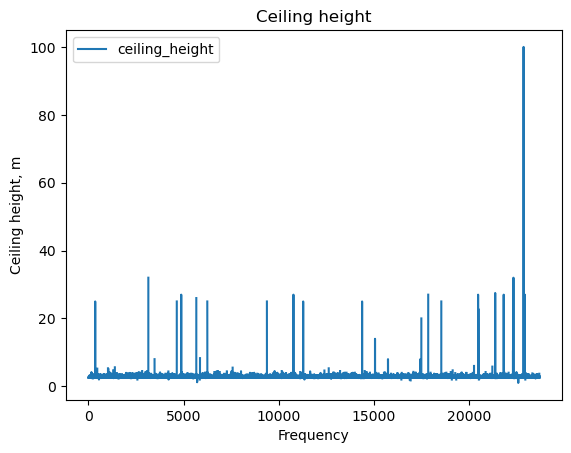

In [7]:
df.plot(y = 'ceiling_height', title = 'Ceiling height')
plt.xlabel('Frequency')
plt.ylabel('Ceiling height, m')
plt.show()

In [8]:
df['ceiling_height'].median()

2.65

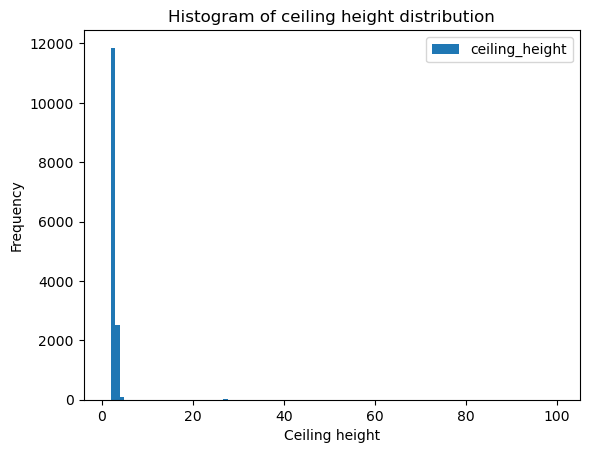

In [9]:
df.plot(y = 'ceiling_height', title = 'Histogram of ceiling height distribution', kind = 'hist', bins = 100)
plt.xlabel('Ceiling height')
plt.ylabel('Frequency')
plt.show()

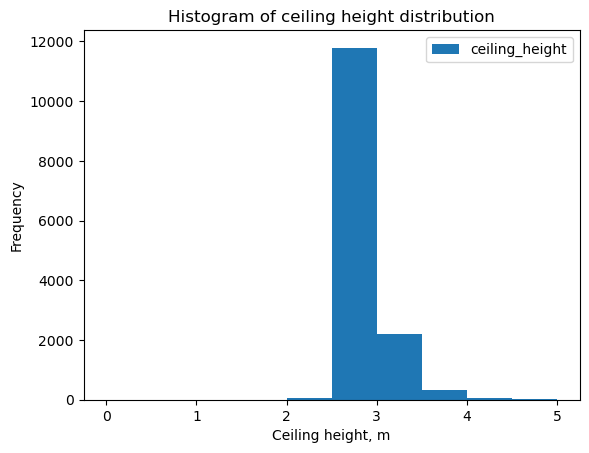

In [10]:
df.plot(y = 'ceiling_height', title = 'Histogram of ceiling height distribution', kind = 'hist', bins = 10, range = (0,5))
plt.ylabel('Frequency')
plt.xlabel('Ceiling height, m')
plt.show()

In [11]:
df[df['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,0.0,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


There are outliers. Delete rows with ceiling heights greater than 5 and less than 2

In [12]:
len(df)

23699

In [13]:
df['ceiling_height'] = df['ceiling_height'].where((df['ceiling_height']  <= 5))

In [14]:
df['ceiling_height'] = df['ceiling_height'].where((df['ceiling_height']  > 2))

In [15]:
len(df)

23699

In [16]:
df['ceiling_height'].isna().sum()

9245

Let's fill in the missing values in the median ceiling height data, depending on the neighborhood.

In [17]:
mapper = df.groupby('locality_name')['ceiling_height'].median().to_dict()
 
def filler(row):
    if pd.isna(row['ceiling_height']):
        return mapper.get(row['locality_name'])
    return row['ceiling_height']
 
df['ceiling_height'] = df.apply(filler, axis=1)

In [18]:
df['ceiling_height'].isna().sum()/len(df)

0.006709143845731887

In [19]:
df[df['ceiling_height'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
110,6,3850000.0,72.30,2017-09-29T00:00:00,2,NaN,3.0,27.4,2,NaN,...,23.6,0.0,деревня Пикколово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
168,9,2250000.0,73.00,2018-11-14T00:00:00,3,NaN,5.0,43.4,5,NaN,...,8.4,0.0,деревня Заклинье,NaN,NaN,NaN,NaN,NaN,NaN,46.0
986,10,1950000.0,62.00,2015-02-19T00:00:00,3,NaN,5.0,NaN,5,NaN,...,NaN,0.0,поселок Севастьяново,NaN,NaN,NaN,NaN,NaN,NaN,1069.0
1451,10,1150000.0,33.00,2016-11-28T00:00:00,1,NaN,3.0,NaN,3,False,...,NaN,2.0,деревня Иссад,NaN,NaN,NaN,NaN,NaN,NaN,245.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0


There are less than a percent of the records that do not specify ceiling heights; replace them with the median for the entire sample.

In [20]:
df['ceiling_height'].median()

2.7

In [21]:
df['ceiling_height'] = df['ceiling_height'].fillna(value = df['ceiling_height'].median())

In [22]:
df['locality_name'] = df['locality_name'].fillna('unknown')
def fill_locality(row):
    if row['locality_name']=='unknown' and row['cityCenters_nearest'] < 9000.0:
        return 'Санкт-Петербург'
    return row['locality_name']
df['locality_name'] = df.apply(fill_locality, axis = 1)

In [23]:
len(df[df['locality_name'] == 'unknown'])


27

In [24]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

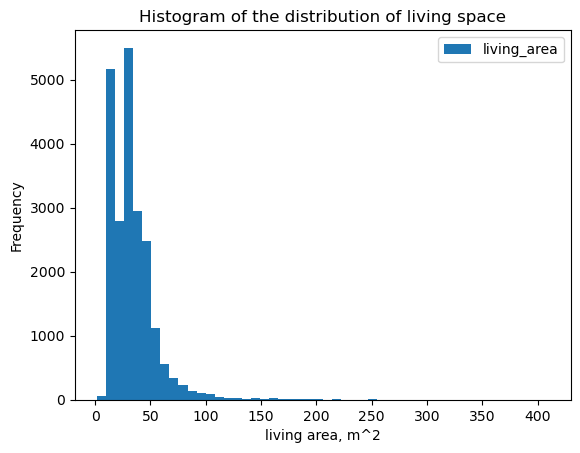

In [25]:
df.plot(y='living_area', kind = 'hist', bins = 50, title = 'Histogram of the distribution of living space')
plt.xlabel('living area, m^2')
plt.ylabel('Frequency')
plt.show()

In [26]:
df['living_area'].median()

30.0

Let's fill in the missing values in the 'living_area' variable based on the number of rooms and total area with the median.

In [27]:
pd.set_option('display.max_columns', None)


In [28]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

There are a total of 147 entries for studio apartments in the apartment data. If the 'living_area' variable is filled, this indicator can be ignored.

In [29]:
living_area_mapper = df.groupby(['locality_name','rooms'])['living_area'].median()

def living_area_filler(row):
    if pd.isna(row['living_area']):
        return living_area_mapper.get((row['locality_name'], row['rooms']))
    return row['living_area']
 
df['living_area'] = df.apply(living_area_filler, axis=1)

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,45.8,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [31]:
df['living_area'].isna().sum()

55

In [32]:
df = df.dropna(subset = ['living_area']).reset_index(drop = True)

In [33]:
df['floors_total'].isna().sum()

86

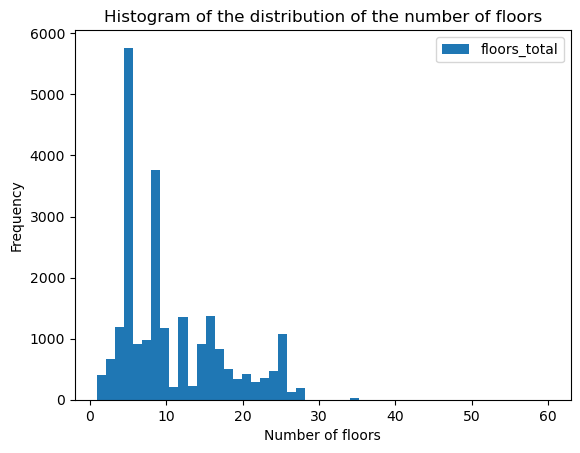

In [34]:
df.plot(y = 'floors_total', kind = 'hist', bins=50, title = 'Histogram of the distribution of the number of floors')
plt.xlabel('Number of floors')
plt.ylabel('Frequency')
plt.show()

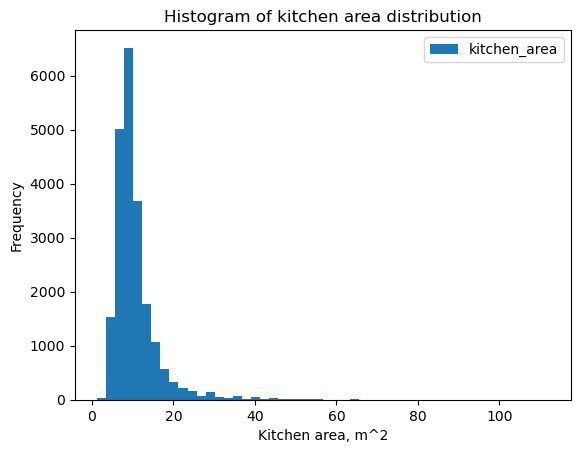

In [35]:
df.plot(y = 'kitchen_area', kind = 'hist', bins=50, title = 'Histogram of kitchen area distribution')
plt.ylabel("Frequency")
plt.xlabel('Kitchen area, m^2')
plt.show()

In [36]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [37]:
df['kitchen_area'].isna().sum() / len(df)

0.09444256470986297

In 9% of the cases, data on kitchen area are missing. We will leave the missing values unchanged, since kitchen area in the old stock of St. Petersburg is unpredictable, and information about the year of construction of the buildings is not provided.

In [38]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

You need to change the type of some data.

In [39]:
df['floors_total'] = df['floors_total'].astype('Int64')

In [40]:
df['is_apartment'] = df['is_apartment'].fillna(value = 'False')

In [41]:
df['is_apartment'] = df['is_apartment'].astype('bool')

In [42]:
df['balcony'] = df['balcony'].astype('int')

In [43]:
df['days_exposition'].isna().sum()

3175

Since the 'days_exposition' and 'floors_total' columns have gaps, we use the 'Int64' parameter to change the type.

In [44]:
df['days_exposition'] = df['days_exposition'].round(0).astype('Int64')

In [45]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

Let's convert the data in the 'first_day_exposition' column to the date_time type

In [46]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [47]:
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

### Conclusion.

There are omissions in variables 'ceiling_height', 'floor_total', 'living_area', 'kitchen_area', 'locality_name' in data. 
* Values in the variable 'locality_name' for lines where it is specified that the distance to the center is less than 13.5 ki - 'locality_name' values are replaced with 'St. Petersburg', for the remaining gaps are set to 'unknown'.
* Values in the variable 'ceiling_height' of more than 10 m are replaced by NaN, then NaN is replaced by the median of the ceiling height value according to 'locality_name'
* Blanks in the variable 'floor_total' are also replaced by the median (according to the data of the whole sample) or by the value 'floor' if it is larger than the mentioned median.
* The omissions in the variable 'living_area' are replaced by the sample median: neighborhood and number of rooms.
* The omissions in the variable 'kitchen_area' were left unchanged (data were omitted in 9% of cases) because it is almost impossible to predict the kitchen area in the old St. Petersburg stock, and data on the year of construction of buildings were not provided.

The median was chosen for all variables in which the missing values were filled in, since the histograms of the above variables exhibit an asymmetric Poisson distribution.

In the variables 'floors_total', 'balcony', 'days_exposition' the data type was changed to integer, because the number of floors and balconies are integers, and the analysis requires the number of full days of listing.

The dateieme64 type was set for the variable 'first_day_exposition'. 

The type of the variable 'is_apartment' was changed to boolean, the missing values were replaced by "False".

## Calculation of additional parameters, addition of the table.

In [48]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [49]:
df['cost_per_square_meter'] = (df['last_price']/df['total_area']).round(2)

In [50]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

In [51]:
def weekday_translate(row):
    day = row['weekday']
    if day == 0:
        return 'Monday'
    if day == 1:
        return 'Tuesday'
    if day == 2:
        return 'Wednessday'
    if day == 3:
        return 'Thursday'
    if day == 4:
        return 'Friday'
    if day == 5:
        return 'Saturday'
    if day == 6:
        return 'Sunday'

In [52]:
df['weekday_name'] = df.apply(weekday_translate, axis=1) 

In [53]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [54]:
df['month'].value_counts().sort_values(ascending = False)

2     2631
3     2578
4     2376
11    2368
10    2127
9     1980
6     1753
8     1741
7     1691
12    1627
1     1499
5     1273
Name: month, dtype: int64

In [55]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [56]:
df = df.dropna(subset = 'floors_total').copy()

In [57]:
def floors_param(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else: 
        return 'other' 
 
df['floors_param'] = df.apply(floors_param, axis=1)

In [58]:
df['living_against_total'] = (df['living_area'] / df['total_area']).round(2)

In [59]:
df['kitchen_against_total'] = (df['kitchen_area'] / df['total_area']).round(2)

In [60]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_meter,weekday,weekday_name,month,year,floors_param,living_against_total,kitchen_against_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,Thursday,3,2019,other,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,Tuesday,12,2018,first,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,Thursday,8,2015,other,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,45.8,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,Friday,7,2015,other,0.29,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,Tuesday,6,2018,other,0.32,0.41


### Conclusion

The data is supplemented with the following columns:
- Price per square meter - 'cost_per_square_meter';
- day of the week - 'weekday'; 
- month - 'month' and publication year - 'year';
- living_against_total' - 'living_against_total';
- ratio of kitchen area to total - 'kitchen_against_total'.

Added column with categorical variables for apartment floor: options - first, last, other.


## Exploratory Data Analysis:

### Analysis of distributions

Let's build histograms for total area, price, number of rooms, ceiling height and price per square meter. For this we will write a function.

In [61]:
def hist_plot(*args):
    for i in args:
        df.plot(y = i, kind = 'hist', bins = 100, figsize = (8,8))
        plt.ylabel('Frequency')
        plt.title(i)
        plt.xlabel(i)
        plt.show()

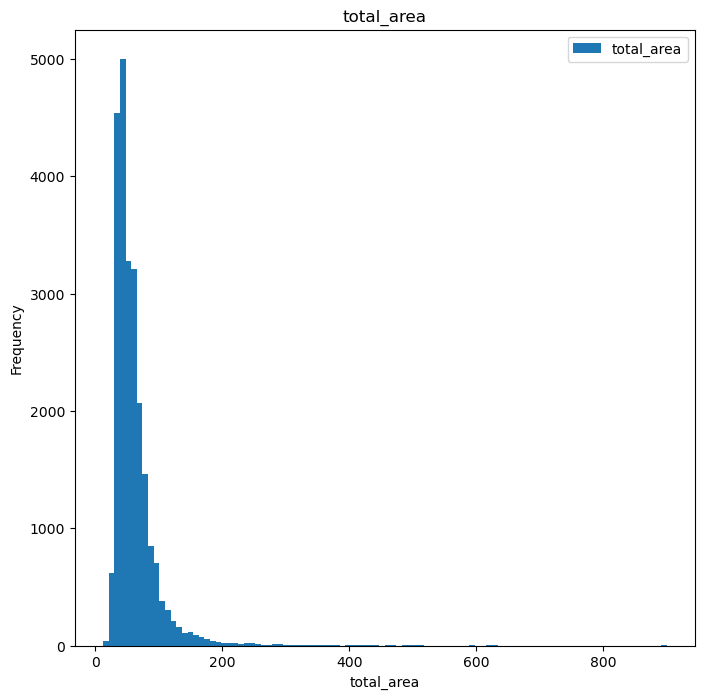

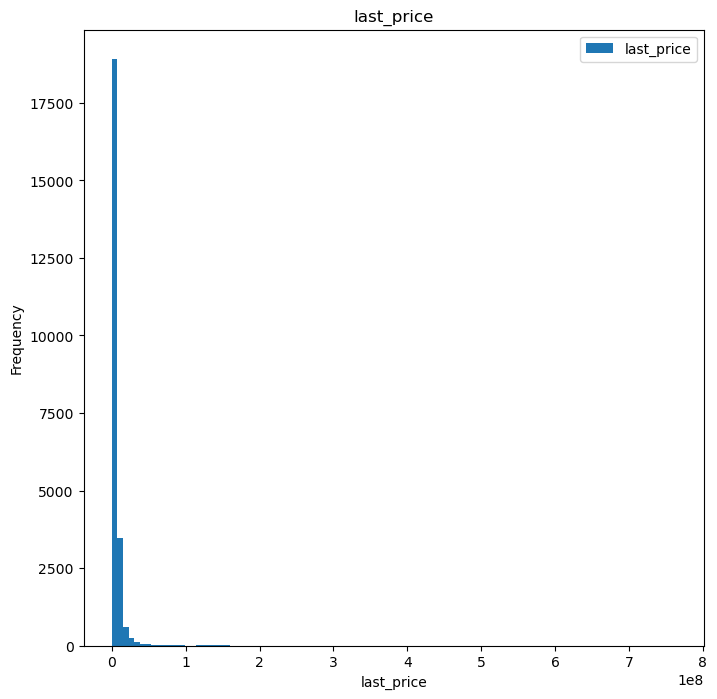

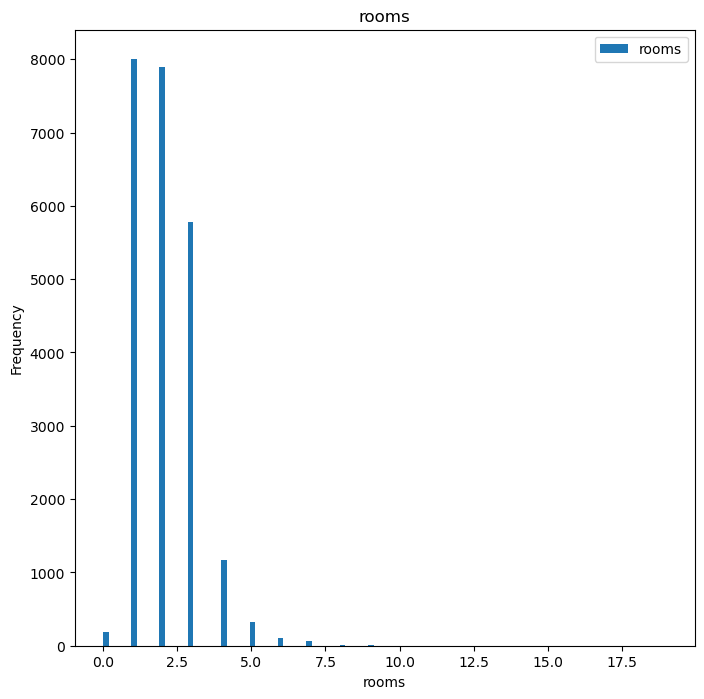

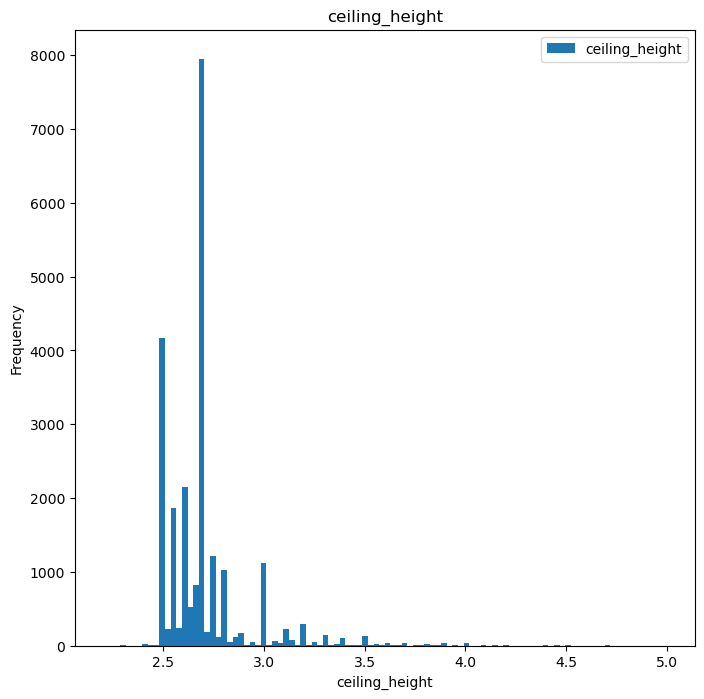

In [62]:
hist_plot('total_area', 'last_price', 'rooms', 'ceiling_height')

It is necessary to consider the histograms in more detail for the different ranges.

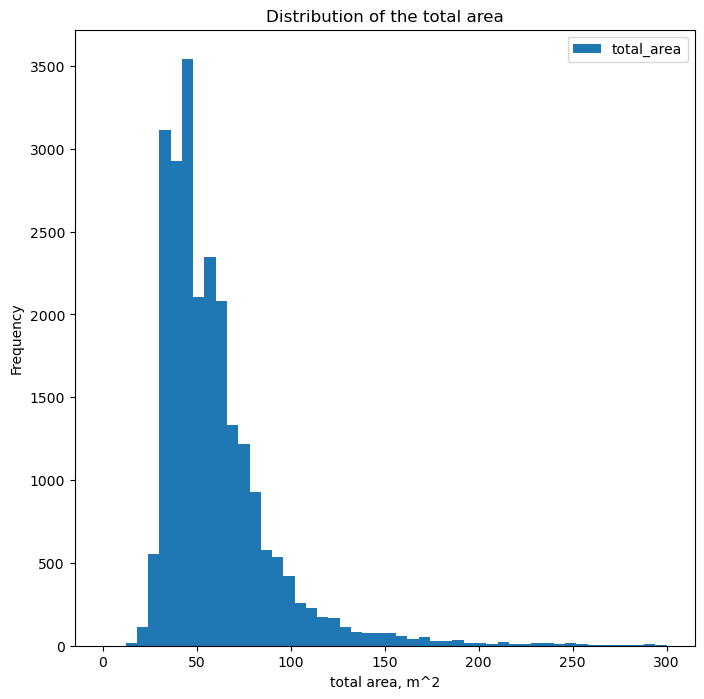

In [63]:
df.plot(y = 'total_area', kind = 'hist', bins = 50, range = [0,300], figsize=(8,8), title = 'Distribution of the total area')
plt.xlabel('total area, m^2')
plt.ylabel('Frequency')
plt.show()

There are three peaks in the distribution of data on apartments by total area: the largest peak is for apartments with a total area of 50 sq. m., slightly less offers of apartments with an area of 30 sq. m. and 60 sq. m. The distribution has a long "tail" in the direction of increasing the area of apartments. It is optimal to consider apartments with the area up to 300 sq.m. for the analysis. 

In [64]:
total_area_max = 300

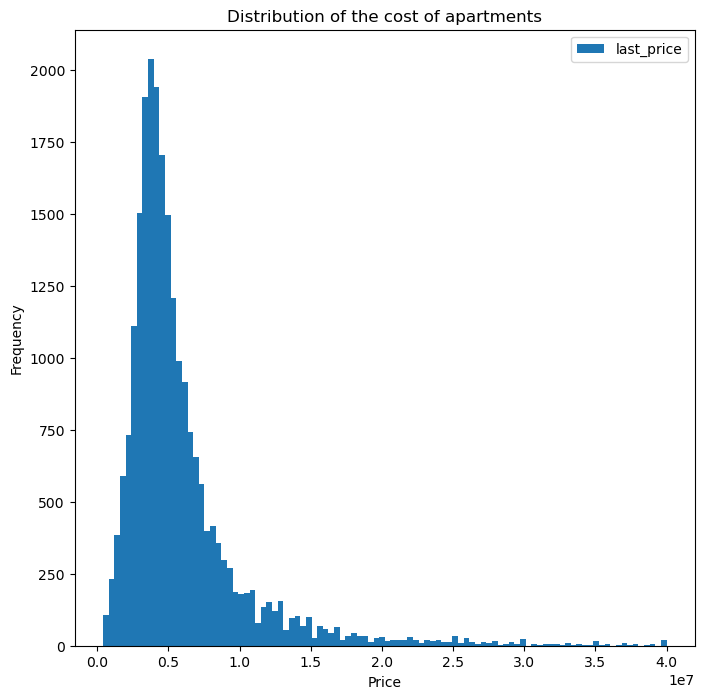

In [65]:
df.plot(y='last_price', kind = 'hist', bins = 100, range = [400000, 40000000], figsize = (8,8), title = 'Distribution of the cost of apartments')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [66]:
df.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_meter,weekday,weekday_name,month,year,floors_param,living_against_total,kitchen_against_total
5684,7,450000.0,42.0,2017-07-31,2,2.615,1,23.0,1,True,False,False,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233,10714.29,0,Monday,7,2017,first,0.55,0.14
8773,7,12190.0,109.0,2019-03-20,2,2.750,25,32.0,25,True,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,111.83,2,Wednessday,3,2019,last,0.29,0.37
9558,7,450000.0,43.4,2018-08-31,2,2.700,5,30.3,3,True,False,False,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96,10368.66,4,Friday,8,2018,other,0.70,0.13
10759,3,490000.0,29.1,2016-05-05,1,2.500,5,17.0,5,True,False,False,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719,16838.49,3,Thursday,5,2016,last,0.58,0.19
14879,5,430000.0,54.0,2018-06-26,2,2.700,3,30.0,3,True,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44,7962.96,1,Tuesday,6,2018,last,0.56,NaN
15998,8,480000.0,32.0,2019-01-06,1,2.500,2,16.0,1,True,False,False,NaN,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83,15000.00,6,Sunday,1,2019,first,0.50,NaN
17417,7,430000.0,30.4,2019-04-22,1,2.500,2,16.0,1,True,False,False,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,14144.74,0,Monday,4,2019,first,0.53,0.20
17636,0,450000.0,36.5,2018-02-01,1,2.700,5,17.3,4,True,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120,12328.77,3,Thursday,2,2018,other,0.47,0.23
18825,1,470000.0,41.0,2018-02-11,1,2.700,5,32.0,3,True,False,False,9.0,0,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46,11463.41,6,Sunday,2,2018,other,0.78,0.22
23429,11,470000.0,44.5,2018-07-02,2,2.500,2,28.0,2,True,False,False,7.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298,10561.80,0,Monday,7,2018,last,0.63,0.17


The distribution of the data on the apartment prices in the region has a clear peak for the apartments priced at 4 million and a long tail towards the increase in the value of the apartments. In order not to lose extra information, we will consider apartments with prices ranging from 400000 to 40000000.

In [67]:
last_price_min = 400000
last_price_max = 40000000

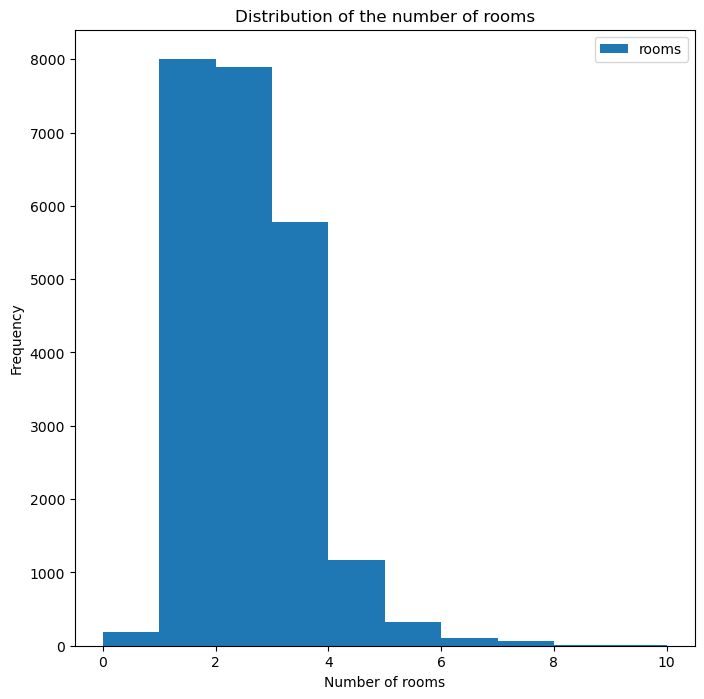

In [68]:
df.plot(y='rooms', kind='hist',bins = 10, range = (0,10), figsize = (8,8), title = 'Distribution of the number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')
plt.show()

In [69]:
df[df['studio']].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_meter,weekday,weekday_name,month,year,floors_param,living_against_total,kitchen_against_total
144,1,2450000.0,27.00,2017-03-30,0,2.70,24,15.50,2,True,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181,90740.74,3,Thursday,3,2017,other,0.57,NaN
439,8,2480000.0,27.11,2018-03-12,0,2.70,17,24.75,4,True,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64,91479.16,0,Monday,3,2018,other,0.91,NaN
606,2,1850000.0,25.00,2019-02-20,0,2.63,10,14.00,7,True,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29,74000.00,2,Wednessday,2,2019,other,0.56,NaN
695,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,True,True,False,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201,103734.44,4,Friday,12,2017,other,0.73,NaN
714,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,True,True,False,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40,88235.29,2,Wednessday,6,2017,first,0.71,NaN


In [70]:
df.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_meter,weekday,weekday_name,month,year,floors_param,living_against_total,kitchen_against_total
646,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,True,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,<NA>,95264.02,6,Sunday,7,2018,last,0.76,0.07
864,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,True,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418,68870.52,5,Saturday,12,2017,other,0.61,0.05
5345,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,True,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14,110169.49,3,Thursday,2,2019,other,0.69,0.17
9665,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,True,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813,170015.46,1,Tuesday,2,2017,other,0.66,0.06
14468,6,32250000.0,374.6,2018-06-09,19,2.70,5,264.5,2,True,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114,86091.83,5,Saturday,6,2018,other,0.71,0.07
18806,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,True,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365,105555.56,0,Monday,3,2015,last,0.67,0.05
19495,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,True,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106,466666.67,2,Wednessday,12,2017,last,0.46,0.12
20782,6,28659000.0,245.4,2016-03-31,14,2.70,4,168.3,2,True,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95,116784.84,3,Thursday,3,2016,other,0.69,0.11


In [71]:
len(df.query('rooms > 10'))

8

The histogram shows the largest supply, in descending order: one-bedroom, two and three-bedroom apartments. There are also apartments with more than 10 rooms (8), but they can be neglected. Apartments with the number of rooms "0" are studios.

In [72]:
rooms_max = 10

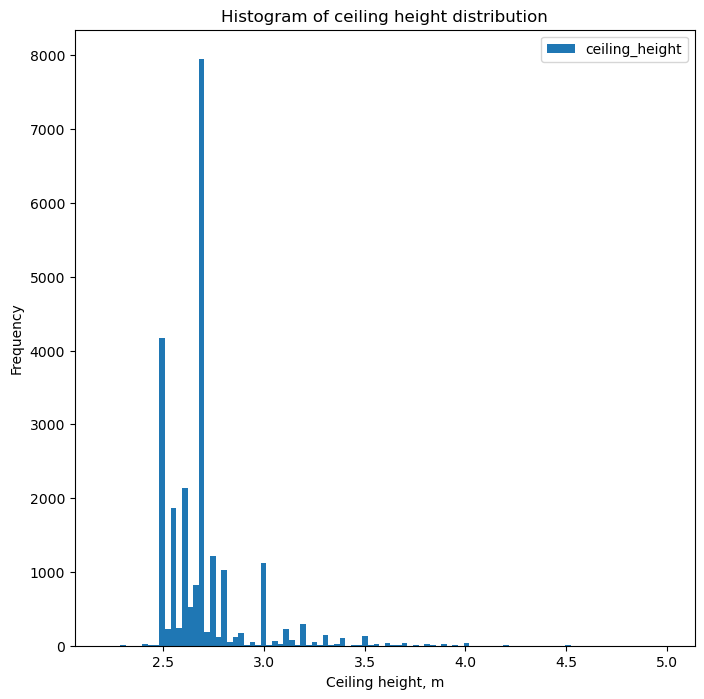

In [73]:
df.plot(y = 'ceiling_height', title = 'Histogram of ceiling height distribution', kind = 'hist', bins = 100, figsize=(8,8))
plt.ylabel('Frequency')
plt.xlabel('Ceiling height, m')
plt.show()

The ceiling height distribution peaks at 2.7 meters.

#### Conclusion

Histograms are built for the parameters: total area, price, number of rooms and ceiling height. 
Before analyzing the data you need to filter the values into the following ranges:
- total area: maximum 300 sq. m;
- price: 400000 to 40 million
- the number of rooms: a maximum of 10;
- ceiling height: 2 to 5 meters.

### Researching the timing of the sale of an apartment

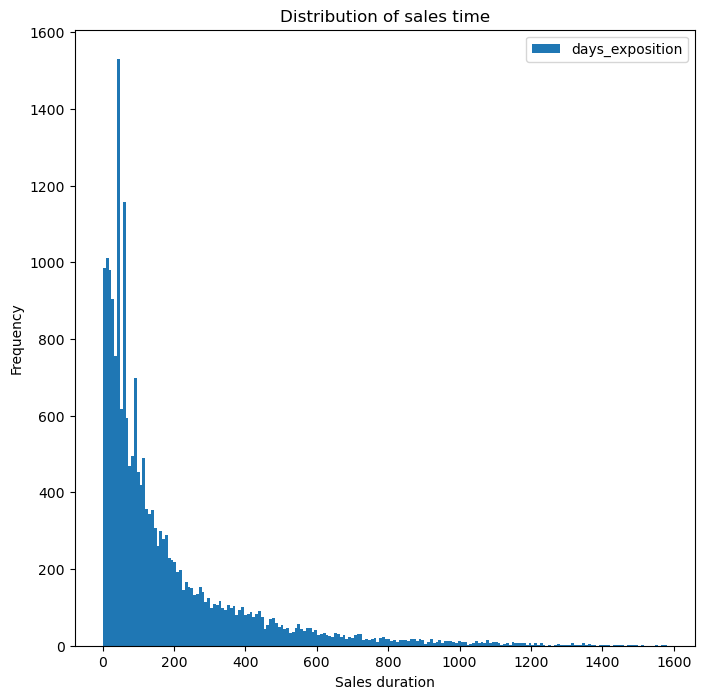

In [74]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 200, figsize = (8,8), title = 'Distribution of sales time')
plt.ylabel('Frequency')
plt.xlabel('Sales duration')
plt.show()

In [75]:
df['days_exposition'].describe()

count       20392.0
mean     181.048303
std      219.741613
min             1.0
25%            45.0
50%            96.0
75%           232.0
max          1580.0
Name: days_exposition, dtype: Float64

There are two peaks on the histogram of the distribution of apartment sale data: 1.5 and 2 months. Also quite a large number of apartments are sold in the first month. In fact, the removal of the ad from the database does not indicate that the apartment is sold (with all the documents drawn up), but only that the client has the firm intention to buy the property. There is no peak in the distribution that says "instant sales," but there is a long tail in the direction of increasing the time of listing. Let's filter the data.   

In [76]:
def subset_by_iqr(df, column):
    # Calculate Q1, Q2 and IQR
    q3 = df[column].quantile(0.99)
    filter = (df[column] <= q3)
    return df.loc[filter]                                                     

In [77]:
len(df)

23558

In [78]:
df = subset_by_iqr(df, 'days_exposition')

In [79]:
len(df)

20189

In [80]:
20189/23558


0.8569912556244164

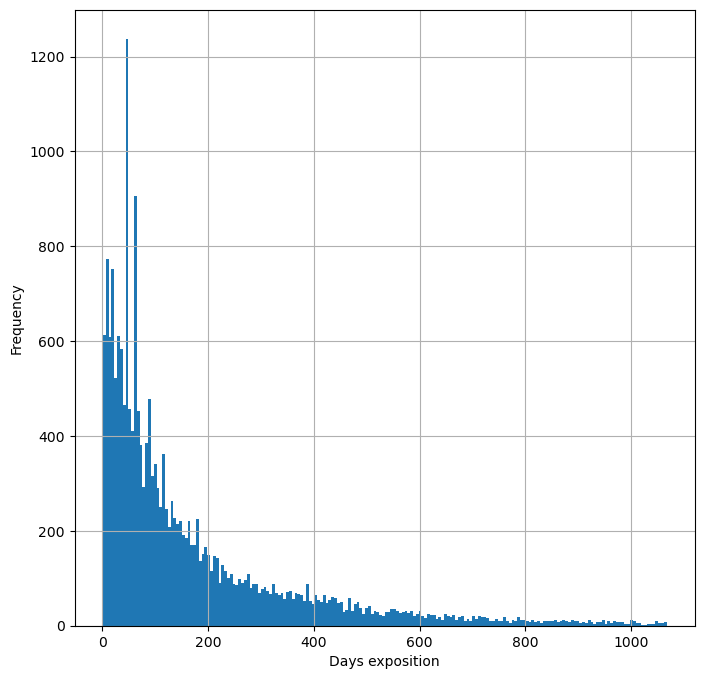

In [81]:
df['days_exposition'].hist(bins = 200, figsize = (8,8))
plt.ylabel('Frequency')
plt.xlabel('Days exposition')
plt.show()

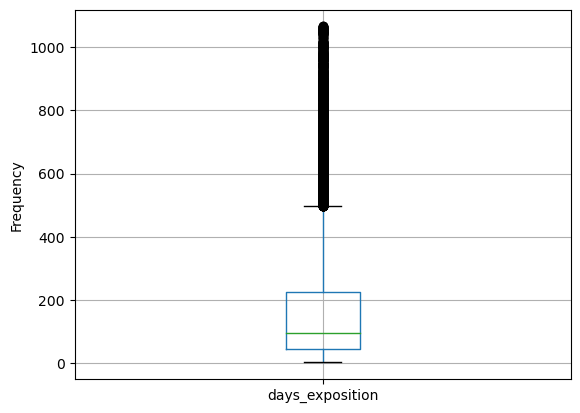

In [82]:
df.boxplot(column = 'days_exposition')
plt.ylabel('Frequency')
plt.show()

In [83]:
df['days_exposition'].describe()

count       20189.0
mean     170.638714
std      194.247584
min             1.0
25%            44.0
50%            94.0
75%           225.0
max          1067.0
Name: days_exposition, dtype: Float64

We filtered quite a lot of data (14%), but too long sales can indicate that something is wrong with the object. There are many issues, such as price, quality of the object, problems with documents, etc.

For further analysis, we were left with data in which the ad was removed between 1 and 1067 days.

#### Conclusion

The average selling time was 171 days and the median was 94 days.

### Control of rare and outliers

Filter the values in the 'total_area', 'last_price', 'rooms' and 'ceiling_height' columns according to the results of the histogram analysis in "Analysis of Distributions"

In [84]:
df = df.query('total_area <= @total_area_max')

In [85]:
len(df)

20143

In [86]:
df = df.query(' @last_price_min <= last_price <= @last_price_max')

In [87]:
len(df)

20034

In [88]:
df = df.query('rooms <= @rooms_max')

In [89]:
len(df)

20032

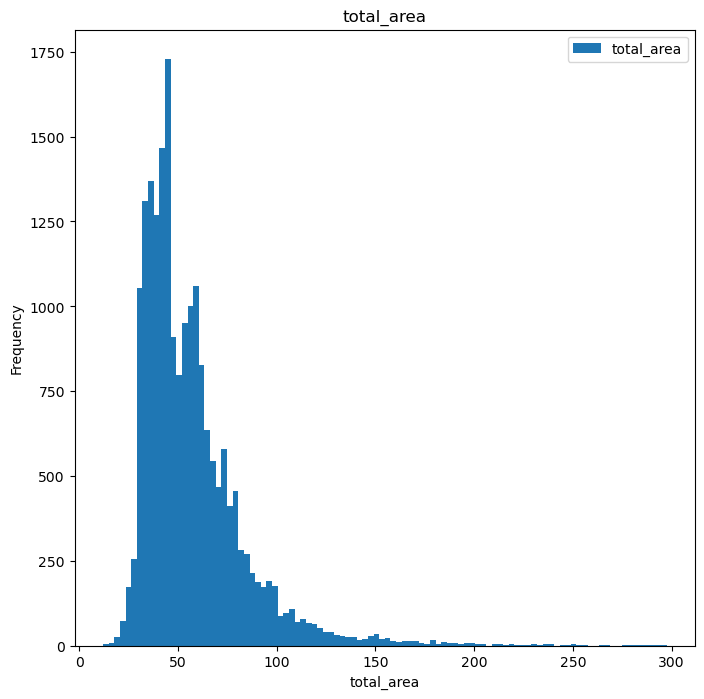

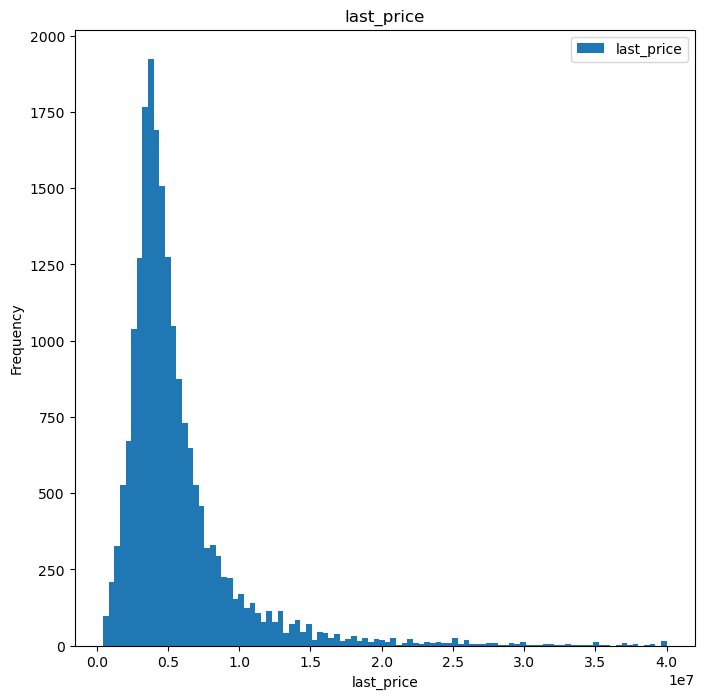

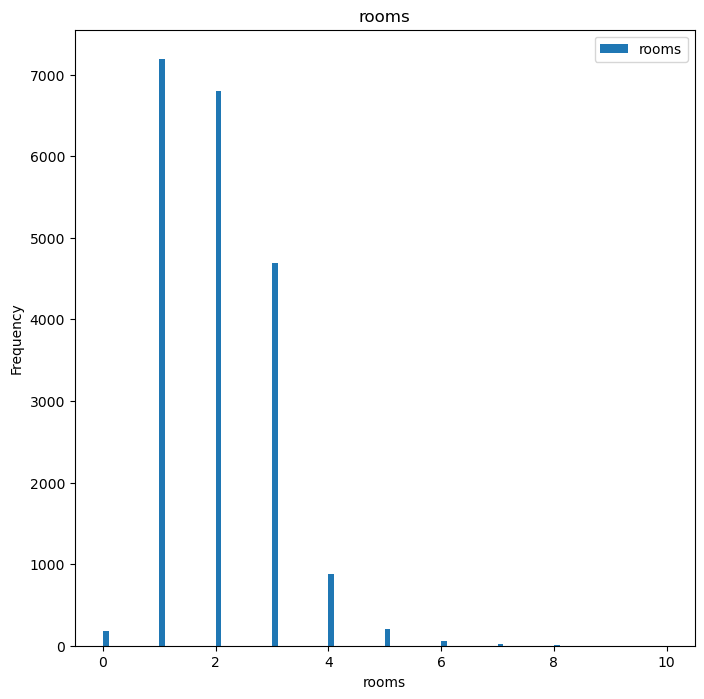

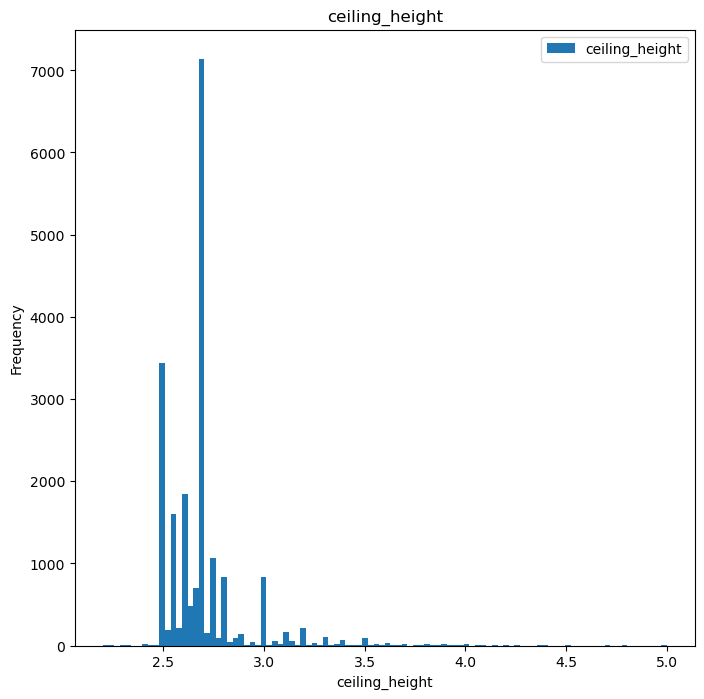

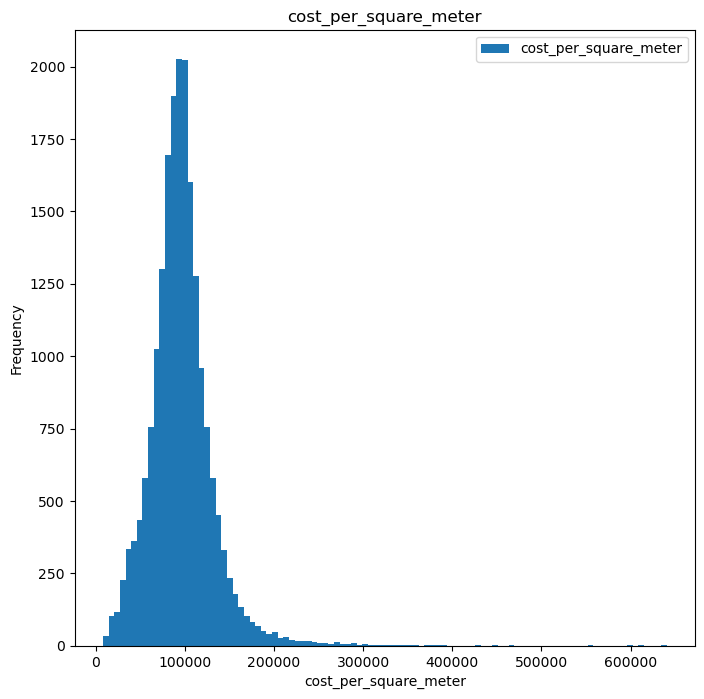

In [90]:
hist_plot('total_area', 'last_price', 'rooms', 'ceiling_height', 'cost_per_square_meter')

Рассмотрим данные о стоимости квадратного метра жилплощади.

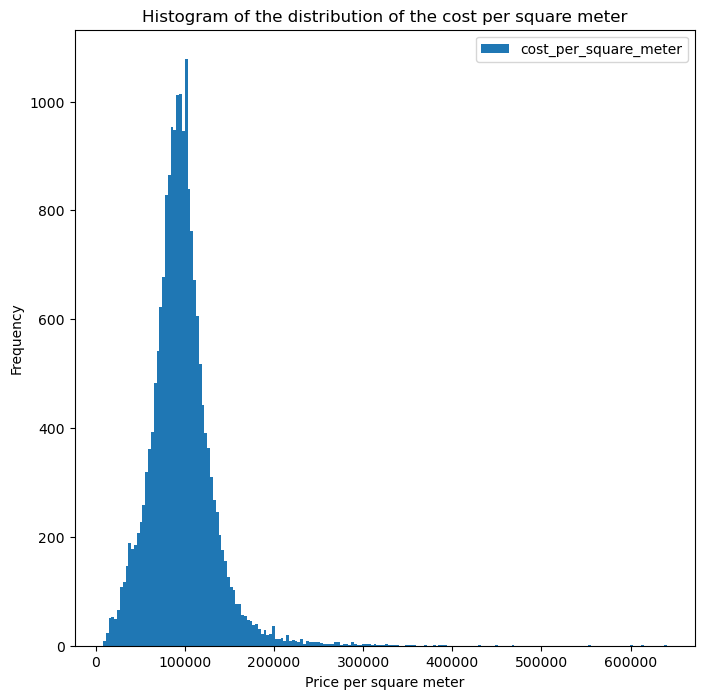

In [91]:
df.plot(y = 'cost_per_square_meter', kind='hist',bins = 200, figsize = (8,8), title = 'Histogram of the distribution of the cost per square meter')
plt.xlabel('Price per square meter')
plt.ylabel('Frequency')
plt.show()

In [92]:
len(df.query('cost_per_square_meter > 250000'))

98

In [93]:
df['cost_per_square_meter'].describe()

count     20032.000000
mean      95969.978337
std       35696.520761
min        7962.960000
25%       76401.255000
50%       93750.000000
75%      111663.565000
max      640422.350000
Name: cost_per_square_meter, dtype: float64

Let's filter the data on the cost per square meter in the range from 20,000 to 250,000

In [94]:
len(df)

20032

In [95]:
df = df.query('20000 <= cost_per_square_meter <= 250000')

In [96]:
len(df)

19809

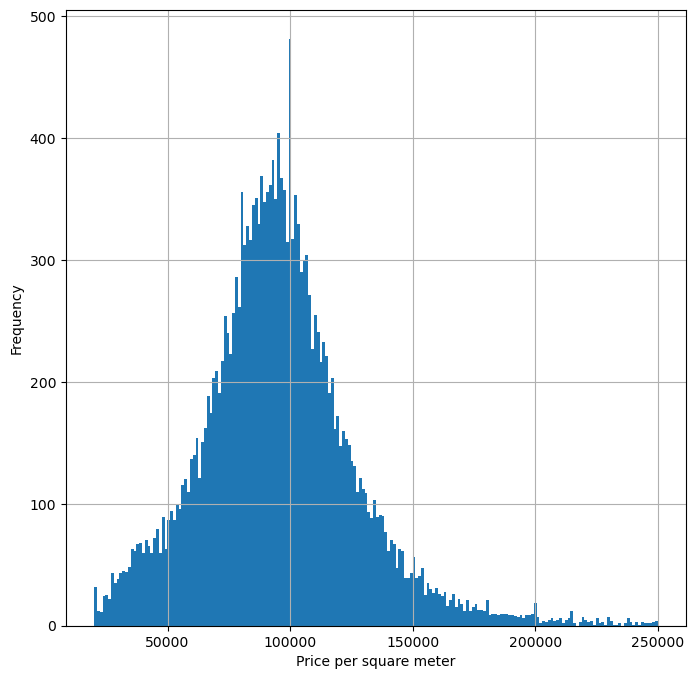

In [97]:
df['cost_per_square_meter'].hist(bins = 200, figsize = (8,8))
plt.xlabel('Price per square meter')
plt.ylabel('Frequency')
plt.show()

In [98]:
df['cost_per_square_meter'].median()

93851.13

In [99]:
df['cost_per_square_meter'].mean()

95406.32466808017

There is a peak in the values of the cost per square meter equal to 100000.

In [100]:
def box_plot(*args):
    for i in args:
        df.boxplot(column = i)
        plt.title(i)
        plt.ylabel('Frequency')
        plt.show()

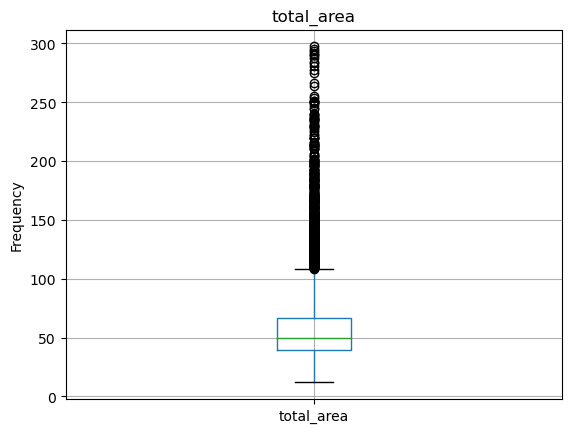

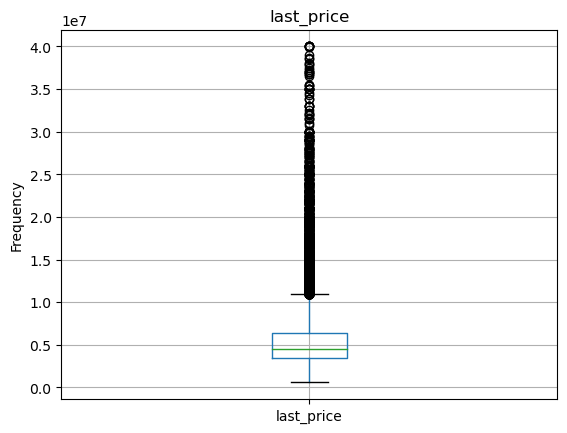

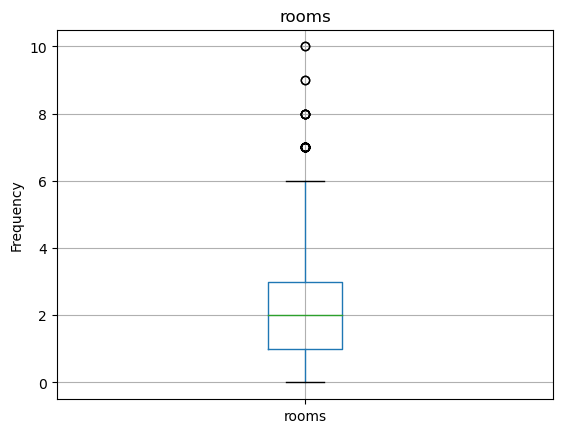

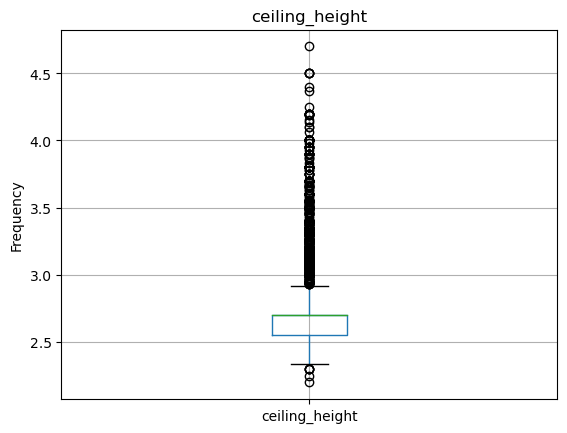

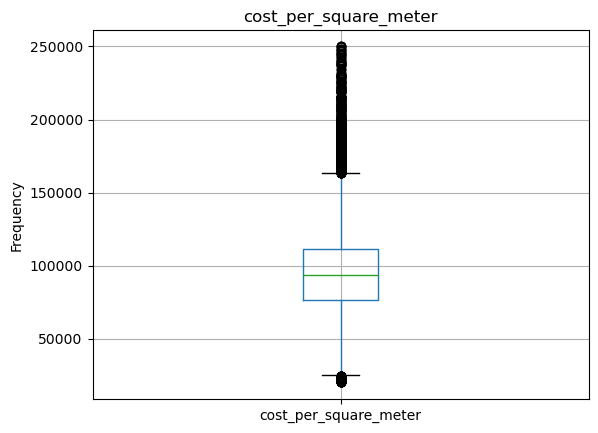

In [101]:
box_plot('total_area', 'last_price', 'rooms', 'ceiling_height', 'cost_per_square_meter')

In [102]:
len(df)/data_len

0.8358580530824086

#### Conclusion

Performed data filtering on the total area, price, number of rooms, ceiling height, and cost per square meter. During the filtering, knocked out values were removed.
Discarded 16% of the data.
The data are suitable for further analysis.

### Analysis of factors affecting the value of the apartment

In [103]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'cost_per_square_meter', 'weekday',
       'weekday_name', 'month', 'year', 'floors_param', 'living_against_total',
       'kitchen_against_total'],
      dtype='object')

In [104]:
data = df[['last_price','total_area','rooms', 'ceiling_height','cityCenters_nearest']].copy()

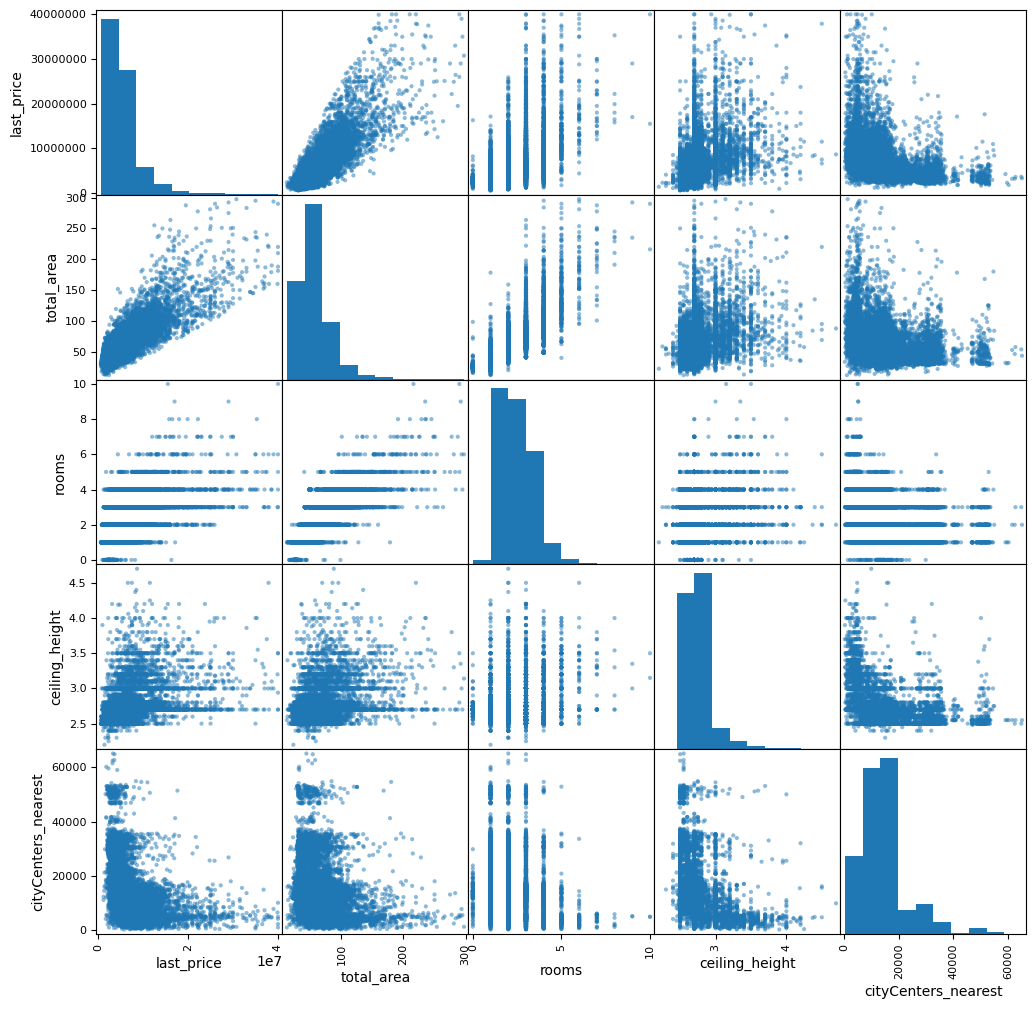

In [105]:
pd.plotting.scatter_matrix(data, figsize=(12,12))
plt.show()

In [106]:
corr = data.corr()

In [107]:
corr

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.816713,0.537412,0.439304,-0.341265
total_area,0.816713,1.000000,0.795055,0.373848,-0.225364
rooms,0.537412,0.795055,1.000000,0.202012,-0.167425
ceiling_height,0.439304,0.373848,0.202012,1.000000,-0.333545
cityCenters_nearest,-0.341265,-0.225364,-0.167425,-0.333545,1.000000


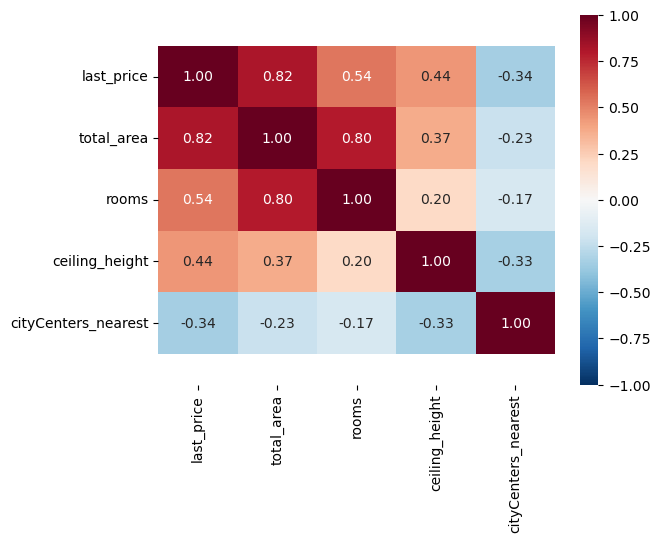

In [108]:
ax = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True, fmt='.2f')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5);

Among the factors most strongly affecting the value of the apartment one can single out the following:
- the highest correlation between the price of the apartment and its total area, the correlation coefficient is 0.82, the distribution graph shows a practically linear dependence between these quantities. this correlation is most clearly observed for apartments priced up to 15 million sq. m. with a total area of up to 150 sq. m.
- there is an average positive correlation between the price and the number of rooms. The Pearson correlation coefficient is 0.54.
- there is a weak positive correlation between price and ceiling height. Pearson's correlation coefficient is 0.44.
- There is a weak negative correlation between price and distance to center. The Pearson correlation coefficient is -0.33. The greatest variability of the price is observed at a distance to the center of less than 2 km.

In [109]:
floors_stat = df.pivot_table(index = 'floors_param', values = 'last_price', aggfunc = ['mean','median','count'])
floors_stat

,mean,median,count
,last_price,last_price,last_price
floors_param,,,
first,4.407711e+06,3850000.0,2374
last,5.517041e+06,4250000.0,2691
other,5.743660e+06,4650000.0,14744


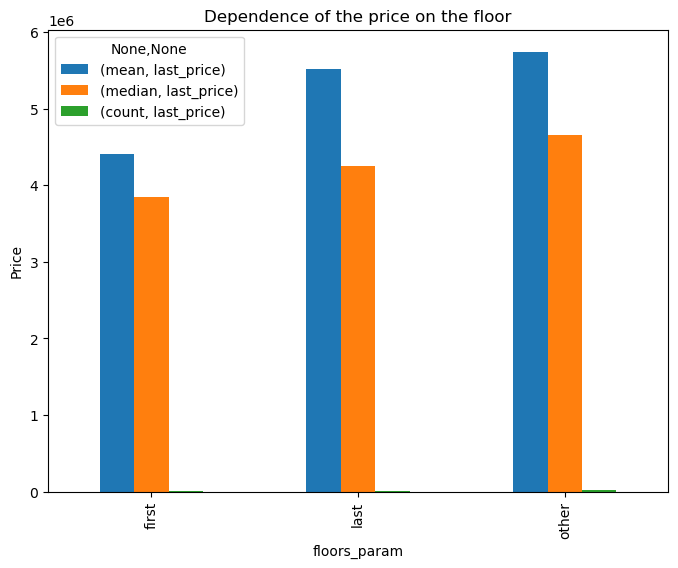

In [110]:
floors_stat.plot(kind = 'bar', title = 'Dependence of the price on the floor',figsize=(8,6))
plt.ylabel('Price')
plt.show()

Apartments located neither on the ground floor nor on the top floor are more expensive: the average and median are 5.74 million and 4.65 million, respectively. 

The average value for apartments located on the first floor is 4.4 million and the median value is 3.85 million.

Apartments on the top floor are more expensive than those on the ground floor. The average and median prices are 5.51 million and 4.25 million.

In [111]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].round(0)/1000

In [112]:
dist_list = range(0,31,1)

In [113]:
df['city_centers_group'] = pd.cut(df['cityCenters_nearest'], dist_list)

In [114]:
dist_from_center = (df
 .groupby('city_centers_group')['last_price'].agg(['count','median','mean']).round(2)
 .sort_values(by = 'mean', ascending = False)
 .head(10)
)
dist_from_center

,count,median,mean
city_centers_group,,,
"(0, 1]",59,9500000.0,12055728.81
"(1, 2]",177,9900000.0,11557107.34
"(4, 5]",715,8990000.0,10738685.24
"(2, 3]",226,8700000.0,10084831.42
"(5, 6]",568,8100000.0,9995375.40
"(3, 4]",402,7995000.0,9541536.84
"(6, 7]",349,7000000.0,8814846.49
"(7, 8]",325,6875055.0,8466253.43
"(8, 9]",560,6163821.5,7699335.18


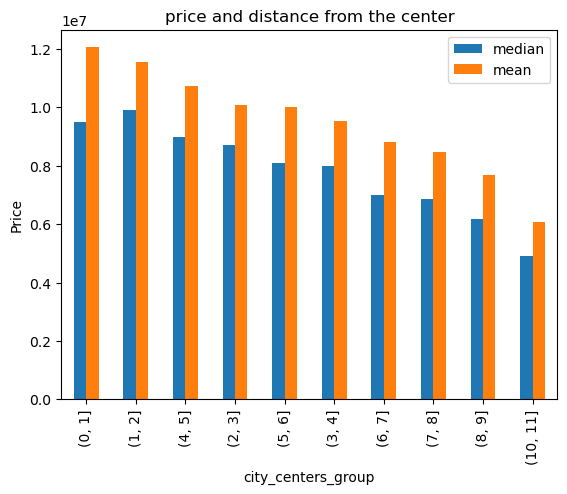

In [115]:
dist_from_center.plot(y = ['median','mean'],kind = 'bar', title = 'price and distance from the center')
plt.ylabel('Price')
plt.show()

In [116]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.3412651186497555

#### Conclusion 1
Apartments in the center are more expensive, and in a radius of 5 km from the center, the prime criterion is the prestige of the area, rather than the distance from the center.


In [117]:
weekday_stat = (df
 .groupby('weekday_name')['last_price'].agg(['count','median','mean']).round(2)
 .sort_values(by = 'count', ascending = False)
)
weekday_stat

,count,median,mean
weekday_name,,,
Thursday,3635,4500000.0,5726507.11
Tuesday,3491,4570000.0,5544273.25
Friday,3422,4450000.0,5459616.18
Wednessday,3292,4500000.0,5605646.24
Monday,2958,4500000.0,5529105.87
Saturday,1594,4500000.0,5392884.56
Sunday,1417,4450000.0,5459374.47


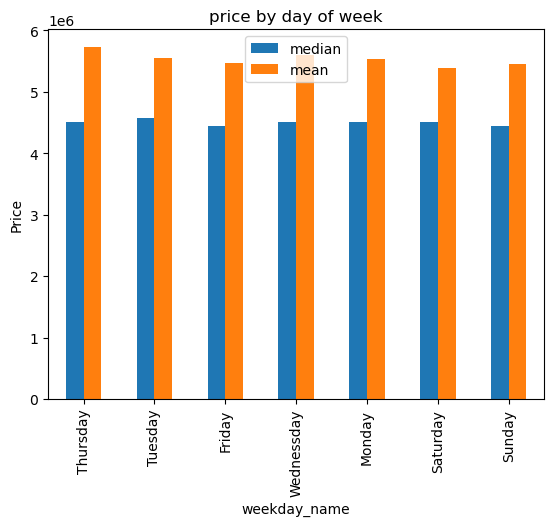

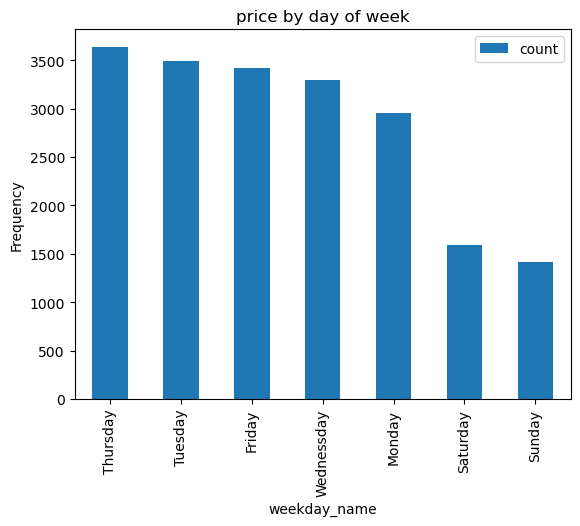

In [118]:
weekday_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by day of week')
plt.ylabel('Price')
plt.show()
weekday_stat.plot(y = 'count',kind = 'bar', title = 'price by day of week')
plt.ylabel('Frequency')
plt.show()

In [119]:
df['last_price'].corr(df['weekday'])

-0.008253234117921083

Most advertisements for apartments for sale are placed on weekdays from Tuesday to Friday, with the most advertisements being placed on Thursday.

The smallest number of ads is on Saturday and Sunday.

No correlation between the value of the apartment and the day of listing has been found; the correlation coefficient is close to zero.

In [120]:
month_stat = (df
 .groupby('month')['last_price'].agg(['count','median','mean']).round(2)
)
month_stat

,count,median,mean
month,,,
1,1255,4500000.0,5591633.76
2,2205,4500000.0,5562923.51
3,1897,4425000.0,5420521.12
4,1478,4500000.0,5570382.22
5,1116,4500000.0,5698484.36
6,1614,4350000.0,5350092.07
7,1518,4500000.0,5549945.79
8,1573,4500000.0,5518338.05
9,1786,4600000.0,5728840.79


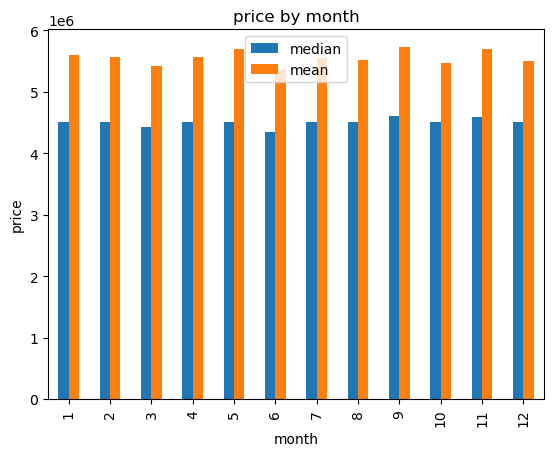

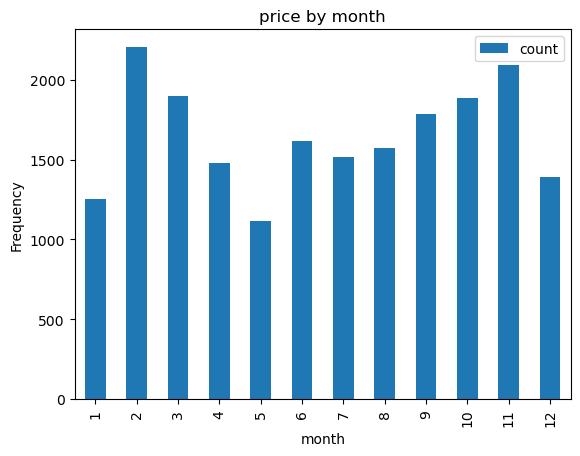

In [121]:
month_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by month')
plt.ylabel('price')
plt.show()
month_stat.plot(y = 'count',kind = 'bar', title = 'price by month')
plt.ylabel('Frequency')
plt.show()

In [122]:
def season(row):
    month= row['month']
    if month == 3 or month == 4 or month == 5:
        return 'spring'
    if month == 6 or month == 7 or month == 8:
        return 'summer'
    if month == 9 or month == 10 or month == 11:
        return 'autumn'
    if month == 12 or month == 1 or month == 2:
        return 'winter'

In [123]:
df['season'] = df.apply(season, axis=1) 

In [124]:
season_stat = (df
 .groupby('season')['last_price'].agg(['count','median','mean']).round(2)
 .sort_values(by = 'count', ascending = False)
)
season_stat

,count,median,mean
season,,,
autumn,5760,4550000.0,5629162.87
winter,4853,4500000.0,5554366.33
summer,4705,4472000.0,5470820.84
spring,4491,4500000.0,5538913.84


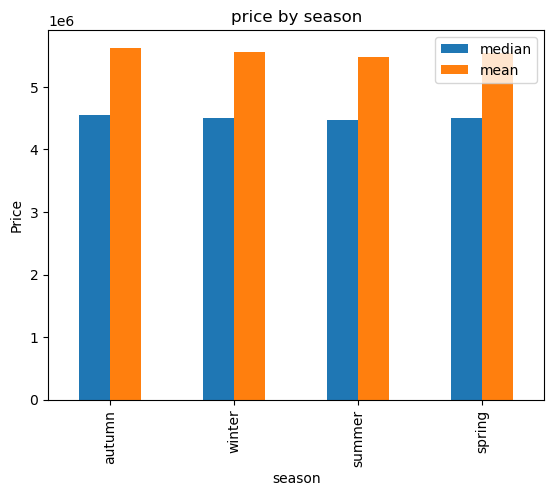

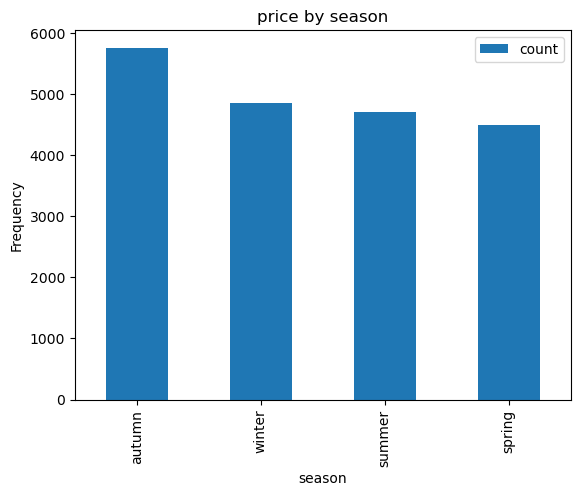

In [125]:
season_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by season')
plt.ylabel('Price')
plt.show()
season_stat.plot(y = 'count',kind = 'bar', title = 'price by season')
plt.ylabel('Frequency')
plt.show()

In [126]:
df['last_price'].corr(df['month'])

0.005396087312839764

In [127]:
4519/5787

0.7808881976844652

The highest number of listings is in February, the lowest in May. From fall to spring the number of listings decreases. Grouped by season, there are 22% more apartments for sale in the fall than in the spring. There is no linear relationship between price and month of listing.

In [128]:
years_stat = (df
 .groupby('year')['last_price'].agg(['count','median','mean']).round(2)
)
years_stat

,count,median,mean
year,,,
2014,75,6390000.0,8107724.88
2015,929,5000000.0,6209690.99
2016,2612,4490000.0,5708935.58
2017,7736,4450000.0,5593530.53
2018,7391,4500000.0,5346644.73
2019,1066,4765000.0,5551188.24


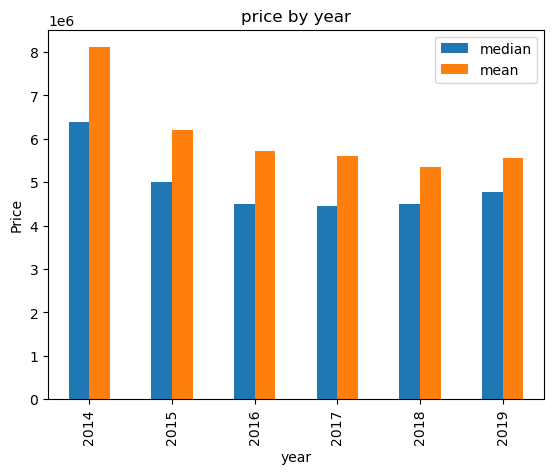

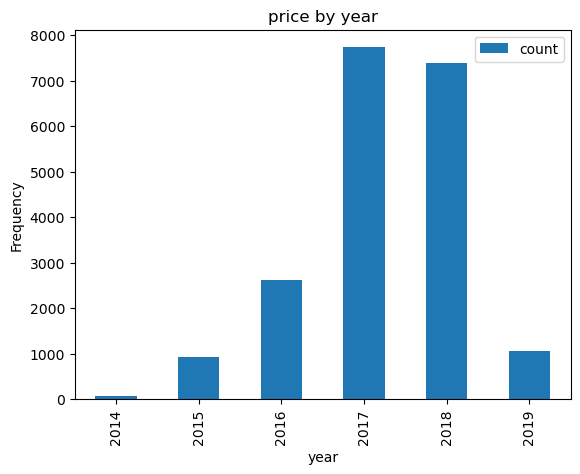

In [129]:
years_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by year')
plt.ylabel('Price')
plt.show()
years_stat.plot(y = 'count',kind = 'bar', title = 'price by year')
plt.ylabel('Frequency')
plt.show()

In [130]:
df['last_price'].corr(df['year'])

-0.051691883383938805

The largest number of apartment listings was in 2017 (based on the data provided). The highest price of apartments was observed in 2014. There is a decrease in the price of apartments until 2018, as well as a slight increase in prices in 2019. 

#### Conclusion 2
No correlation was found between the day of the week, month, and the cost of housing. The highest number of listings is Tuesday through Friday, and the lowest number is on weekends.

The number of listings is highest in February and twice as high as the lowest in May. 
Grouped by season, there are 35% more listings in the fall than in the spring.

The most apartment listings were posted in 2017 (based on the data provided). The highest apartment prices were observed in 2014. There is a decrease in apartment prices through 2018, and a slight increase in prices in 2019. 

In [131]:
locality_stat = (df
     .pivot_table(index = 'locality_name', 
                  values = ['last_price','cost_per_square_meter'],
                  aggfunc = ['median','mean','count'])
)

In [132]:
locality_stat.columns = ['p_sq_median','p_median','p_sq_mean','p_mean', 'p_sq_count','p_count']

In [133]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [134]:
locality_stat = (locality_stat
             .sort_values(by = 'p_count', ascending = False).head(10).copy()
)

In [135]:
locality_stat

,p_sq_median,p_median,p_sq_mean,p_mean,p_sq_count,p_count
locality_name,,,,,,
Санкт-Петербург,102564.10,5250000.00,107983.93,6576898.19,13189,13189
посёлок Мурино,86231.88,3400000.00,85801.88,3664307.62,513,513
посёлок Шушары,76037.18,3900000.00,77825.56,4050509.36,406,406
Всеволожск,65789.47,3350000.00,66891.92,3625921.14,336,336
Колпино,73728.81,3570000.00,74700.75,3793722.12,305,305
посёлок Парголово,91387.36,4020000.00,89591.39,4381744.86,300,300
Пушкин,97938.14,4990000.00,101699.54,5856046.70,299,299
деревня Кудрово,91803.28,3790000.00,92420.44,4230717.58,297,297
Гатчина,67647.06,3050000.00,68548.24,3394339.85,265,265


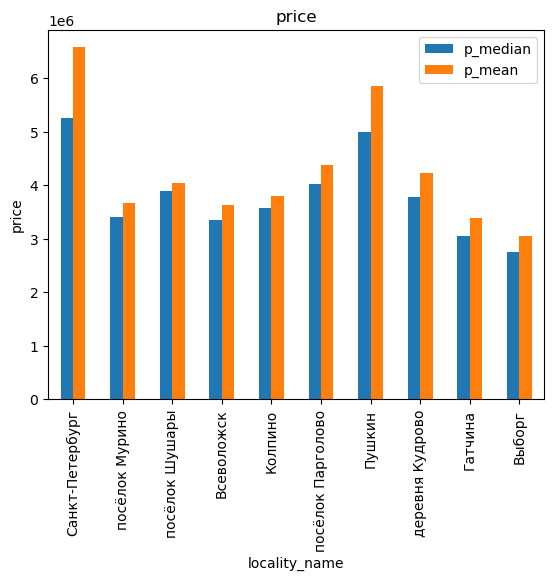

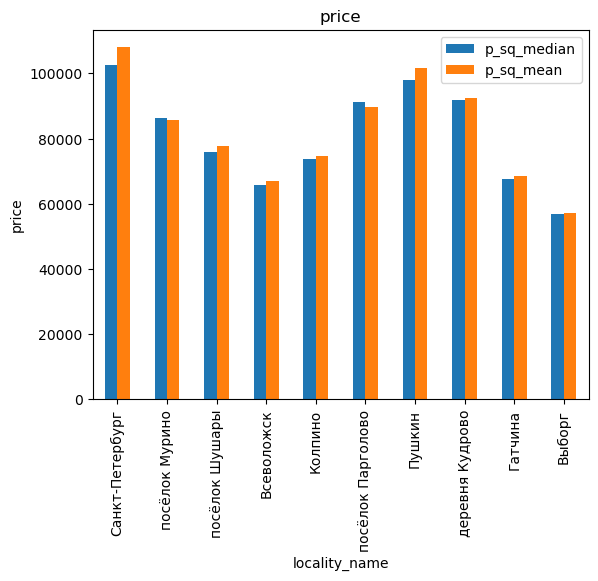

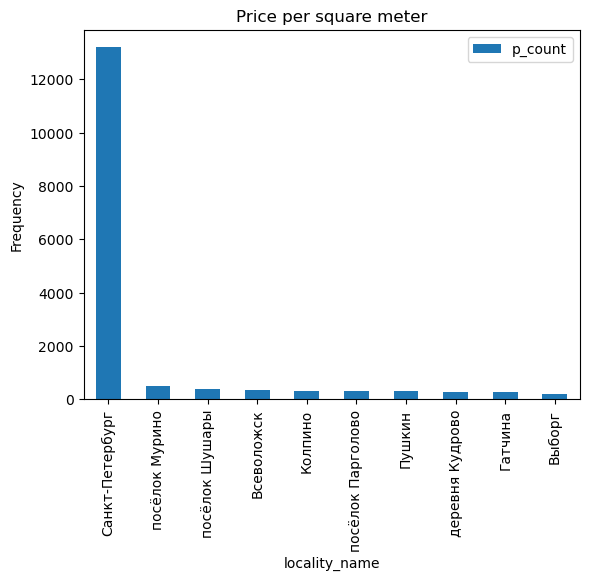

In [136]:
locality_stat.plot(y = ['p_median', 'p_mean'],kind = 'bar', title = 'price')
plt.ylabel('price')
plt.show()
locality_stat.plot(y = ['p_sq_median', 'p_sq_mean'],kind = 'bar', title = 'price')
plt.ylabel('price')
plt.show()
locality_stat.plot(y = 'p_count',kind = 'bar', title = 'Price per square meter')
plt.ylabel('Frequency')
plt.show()

The highest cost of housing in St. Petersburg: median value 5.2 million, average value 6.48 million. The cost per square meter in St. Petersburg 102500 - median value, 107800 - average value. In second and third place are Kudrovo and Pushkin.

The cost of housing in the city of Vyborg is the lowest: the median value is 2.75 million, the average value is 3.05 million. The cost per square meter in Vyborg is 56700 - the median value, 57200 - the average value.


In [137]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'].round(0).copy()

In [138]:
distance_dep_stat = (df
 .query('locality_name == "Санкт-Петербург"')
 .groupby('cityCenters_nearest_km')['last_price'].agg(['count','mean']).round(2)
)
distance_dep_stat.head()

,count,mean
cityCenters_nearest_km,,
0.00,13,11106153.85
1.00,146,12084308.21
2.00,225,10919311.11
3.00,265,9272750.57
4.00,542,10036077.84


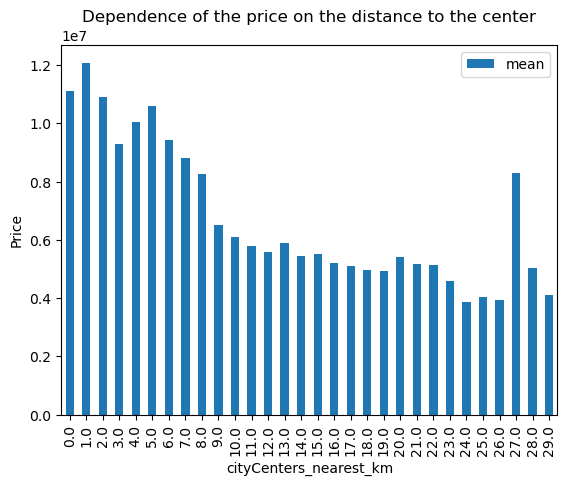

In [139]:
distance_dep_stat.plot(y = ['mean'],kind = 'bar', title = 'Dependence of the price on the distance to the center')
plt.ylabel('Price')
plt.show()

The greatest value of apartments is observed at a distance of 1 km. from the center, then there is a decrease in the value of apartments to a distance of 3 sq. km. from the center.
Let's take the area with a radius of 3 km as the central part of the city.

In [140]:
center_stat = df.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"').copy()

In [141]:
center_stat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_square_meter,weekday,weekday_name,month,year,floors_param,living_against_total,kitchen_against_total,city_centers_group,season,cityCenters_nearest_km
24,8,6500000.00,97.20,2015-10-31,2,2.70,3,46.50,1,True,False,False,19.60,0,Санкт-Петербург,20052.00,2.34,3.00,411.00,3.00,124.00,265,66872.43,5,Saturday,10,2015,first,0.48,0.20,"(2, 3]",autumn,2.00
99,32,9600000.00,90.00,2017-09-26,4,2.70,5,67.00,2,True,False,False,8.00,0,Санкт-Петербург,23277.00,2.82,0.00,NaN,0.00,NaN,104,106666.67,1,Tuesday,9,2017,other,0.74,0.09,"(2, 3]",autumn,3.00
138,8,4800000.00,40.00,2017-11-18,2,2.70,3,29.00,2,True,False,False,6.00,0,Санкт-Петербург,23371.00,2.91,0.00,NaN,2.00,729.00,80,120000.00,5,Saturday,11,2017,other,0.72,0.15,"(2, 3]",autumn,3.00
154,1,8200000.00,80.00,2018-11-06,3,4.15,3,44.20,2,True,False,False,12.20,0,Санкт-Петербург,20562.00,3.17,2.00,344.00,1.00,838.00,38,102500.00,1,Tuesday,11,2018,other,0.55,0.15,"(3, 4]",autumn,3.00
200,5,10880000.00,123.10,2015-11-12,6,3.20,5,89.00,2,True,False,False,11.00,0,Санкт-Петербург,26009.00,3.37,2.00,516.00,0.00,NaN,992,88383.43,3,Thursday,11,2015,other,0.72,0.09,"(3, 4]",autumn,3.00


In [142]:
center_data = center_stat[['last_price','total_area','rooms', 'ceiling_height','cityCenters_nearest']].copy()

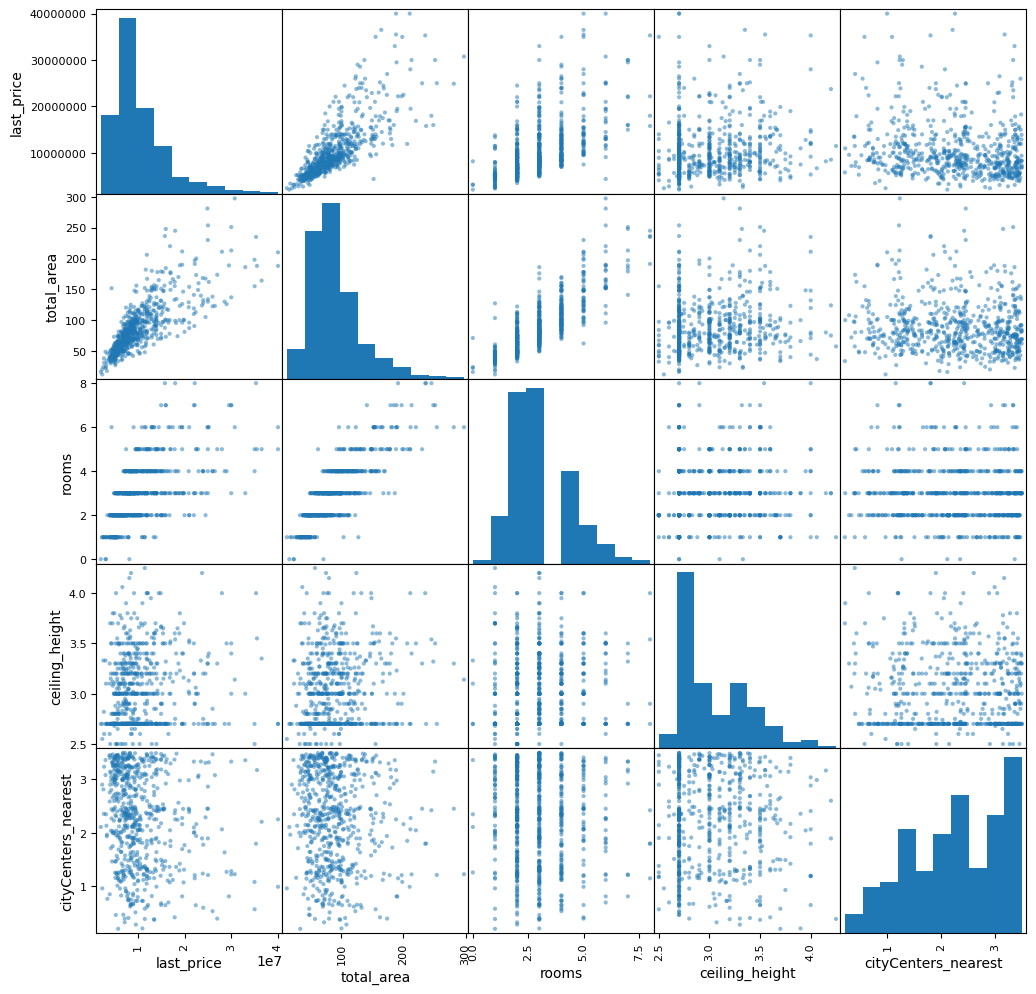

In [143]:
pd.plotting.scatter_matrix(center_data, figsize=(12,12))
plt.show()

In [144]:
corr = center_data.corr()
corr

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.00,0.77,0.58,0.15,-0.17
total_area,0.77,1.00,0.82,0.15,-0.08
rooms,0.58,0.82,1.00,0.09,-0.06
ceiling_height,0.15,0.15,0.09,1.00,-0.05
cityCenters_nearest,-0.17,-0.08,-0.06,-0.05,1.00


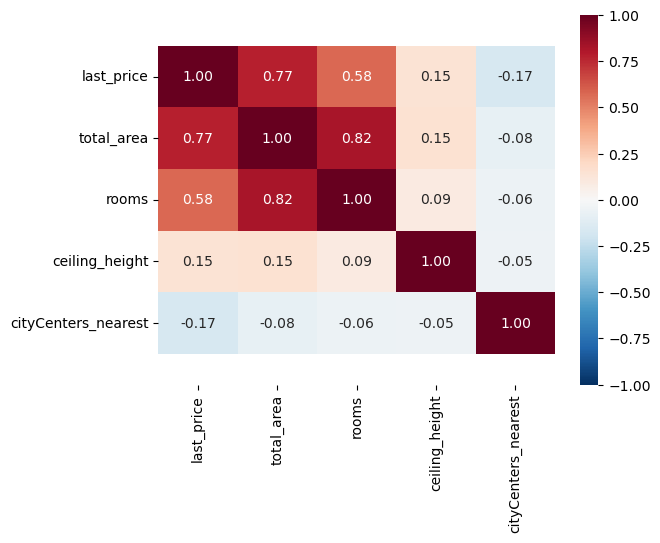

In [145]:
ax = sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True, fmt='.2f')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5);

In [146]:
center_floors_stat = center_stat.pivot_table(index = 'floors_param', values = 'last_price', aggfunc = ['mean','median','count'])
center_floors_stat

,mean,median,count
,last_price,last_price,last_price
floors_param,,,
first,8047548.03,6150000.00,102
last,10281471.70,8800000.00,159
other,11255693.30,9500000.00,388


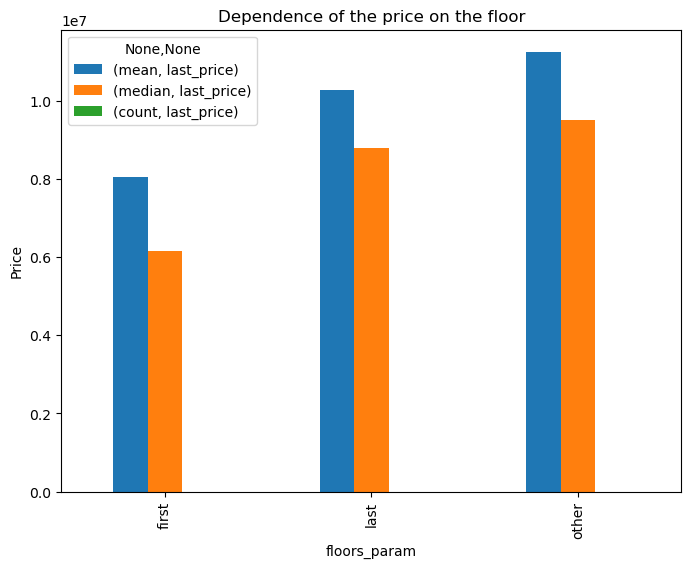

In [147]:
center_floors_stat.plot(kind = 'bar', title = 'Dependence of the price on the floor',figsize=(8,6))
plt.ylabel('Price')
plt.show()

In [148]:
weekday_center_stat = (center_stat
 .groupby('weekday_name')['last_price'].agg(['count','median','mean']).round(2)
 .sort_values(by = 'count', ascending = False)
)
weekday_center_stat

,count,median,mean
weekday_name,,,
Thursday,146,8550000.00,11039842.47
Friday,121,8900000.00,10115057.85
Wednessday,108,9500000.00,11161814.81
Tuesday,93,8300000.00,9760246.24
Monday,91,9000000.00,10406802.20
Saturday,45,7680000.00,9375066.64
Sunday,45,9400000.00,11222177.78


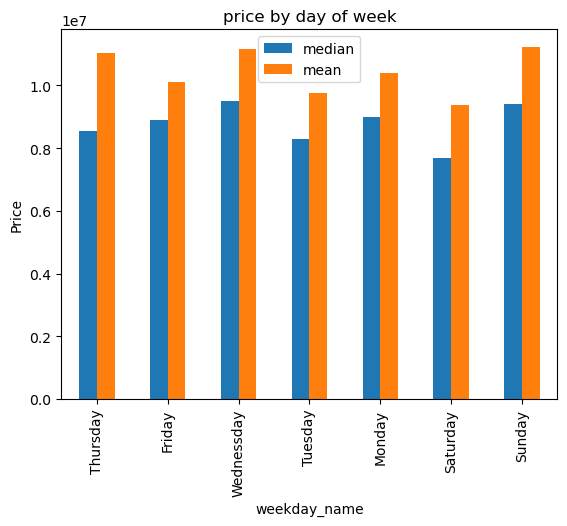

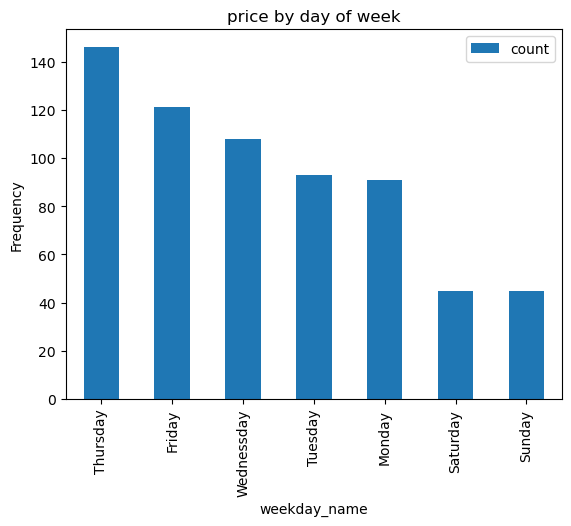

In [149]:
weekday_center_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by day of week')
plt.ylabel('Price')
plt.show()
weekday_center_stat.plot(y = 'count',kind = 'bar', title = 'price by day of week')
plt.ylabel('Frequency')
plt.show()

In [150]:
center_stat['last_price'].corr(center_stat['weekday'])

0.006603660802578231

In [151]:
month_center_stat = (center_stat
 .groupby('month')['last_price'].agg(['count','median','mean']).round(2)
)
month_center_stat

,count,median,mean
month,,,
1,44,8700000.00,10269045.45
2,79,9270000.00,10938088.61
3,46,8595000.00,10072782.61
4,48,9175000.00,10395395.81
5,42,9175000.00,10788023.81
6,37,8820000.00,10428054.05
7,68,9050000.00,10314117.65
8,41,8000000.00,9823609.76
9,63,9500000.00,10338887.30


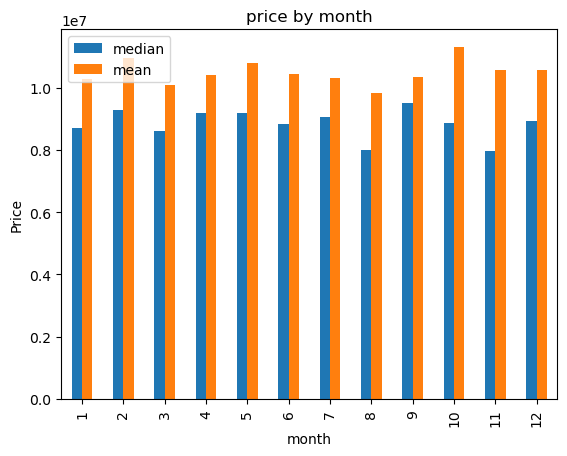

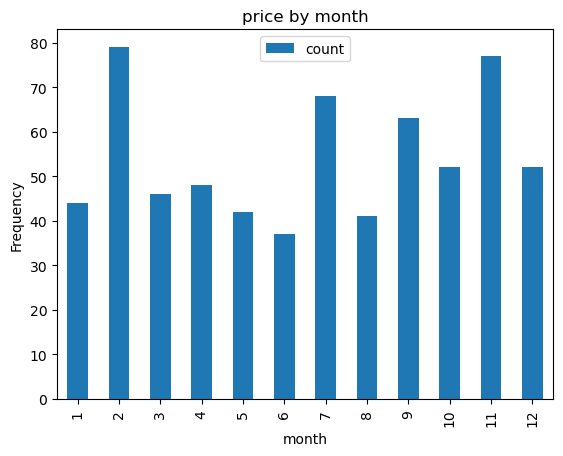

In [152]:
month_center_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by month')
plt.ylabel('Price')
plt.show()
month_center_stat.plot(y = 'count',kind = 'bar', title = 'price by month')
plt.ylabel('Frequency')
plt.show()

In [153]:
center_stat['season'] = center_stat.apply(season, axis=1) 

In [154]:
season_center_stat = (center_stat
 .groupby('season')['last_price'].agg(['count','median','mean']).round(2)
 .sort_values(by = 'count', ascending = False)
)
season_center_stat

,count,median,mean
season,,,
autumn,192,8725000.00,10689067.19
winter,175,9000000.00,10657840.00
summer,146,8700000.00,10205246.58
spring,136,8995000.00,10407529.40


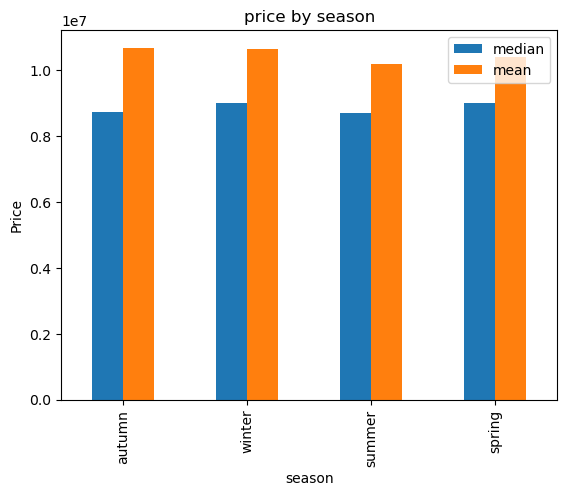

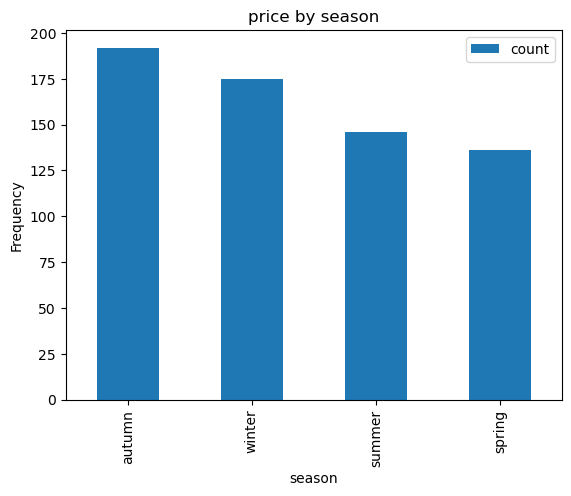

In [155]:
season_center_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by season')
plt.ylabel('Price')
plt.show()
season_center_stat.plot(y = 'count',kind = 'bar', title = 'price by season')
plt.ylabel('Frequency')
plt.show()

In [156]:
center_stat['last_price'].corr(center_stat['month'])

0.005455549694773763

In [157]:
years_center_stat = (center_stat
 .groupby('year')['last_price'].agg(['count','median','mean']).round(2)
)
years_center_stat

,count,median,mean
year,,,
2014,2,11850000.00,11850000.00
2015,62,9775000.00,11700951.61
2016,101,9400000.00,10292950.50
2017,275,8500000.00,10207348.73
2018,183,9000000.00,10608229.50
2019,26,8350000.00,10989961.54


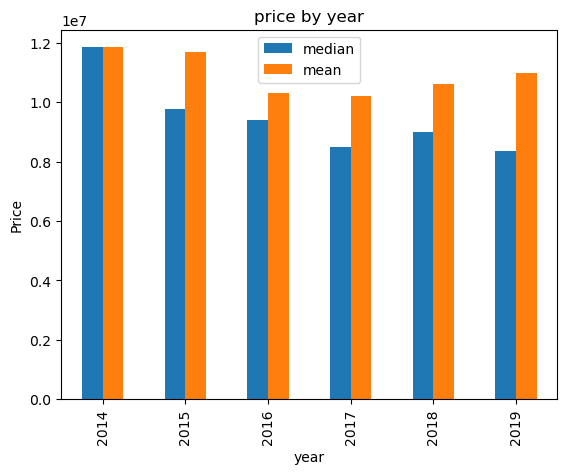

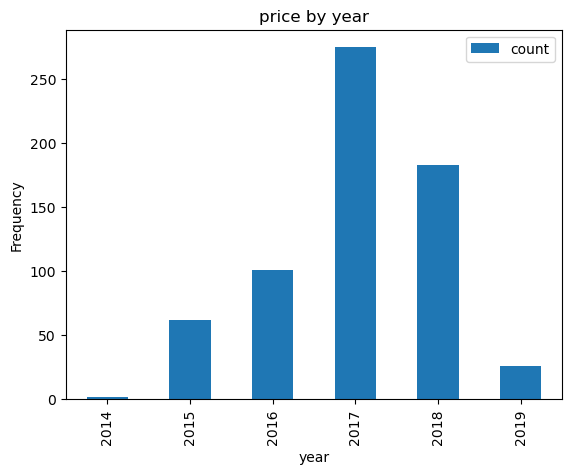

In [158]:
years_center_stat.plot(y = ['median','mean'],kind = 'bar', title = 'price by year')
plt.ylabel('Price')
plt.show()
years_center_stat.plot(y = 'count',kind = 'bar', title = 'price by year')
plt.ylabel('Frequency')
plt.show()

In [159]:
center_stat['last_price'].corr(center_stat['year'])

-0.023394115197457124

#### Conclusion 3.
The analysis of the central part of St. Petersburg (within a radius of 0 - 3 km.) showed that the total area of the apartment is the most important factor in pricing both for the center and the city in general, the same can be said about the number of rooms. In general, the nature of the distribution of data on the real estate market in the center and in the whole city has the same trends.

### General conclusion

The analysis of data on the real estate market in St. Petersburg and the surrounding area within a radius of 30 km has been conducted. The data for the period from 2015 to 2019 are analyzed. 

Of the factors that most strongly affect the cost of the apartment can be identified as follows:
- the highest correlation between the cost of the apartment and its total area, the correlation coefficient is 0.81, the distribution graph shows an almost linear relationship between these values.This relationship is most clearly observed for apartments worth up to 15 million with a total area of up to 150 m.
- there is an average positive correlation between the price and the number of rooms. The Pearson correlation coefficient is 0.53.
- there is a weak positive correlation between price and ceiling height. Pearson's correlation coefficient is 0.43.
- There is a weak negative correlation between price and distance to center. The Pearson correlation coefficient is -0.34. At the same time, the greatest variability in price is observed at a distance from the center of less than 2 km.

- Apartments not located on the first or last floor are more expensive: the average and median are 5.67 million and 4.6 million, respectively. 
- The first floor apartments have an average price of 4.35 million and the median value is 3.8 million.
- Apartments on the top floor are more expensive than those on the ground floor. The average and median prices are 5.41 million and 4.2 million.

- Apartments in the center are more expensive, and in a radius of 5 km. from the center the prime criterion is the prestige of the area, rather than the distance from the center.

- There is no correlation between the day of the week and the month of the month with the cost of housing. The highest number of listings is Tuesday through Friday, and the lowest number is on weekends.

- The most apartment listings were posted in 2017, with the lowest value occurring in 2015. The highest value of apartments was observed in 2015. 

- The highest cost of housing in St. Petersburg: median value 5.2 million, the average value of 6.48 million. The cost per square meter in St. Petersburg 102500 - median value, 107800 - average value.

- The lowest price for housing in Vyborg: median value 2.75mln, average value 3.05mln. The price per square meter in Vyborg is 56700 - median value, 57200 - average value.
- The analysis of the central part of Saint-Petersburg (in the range from 0 to 3km) has shown that the total area of the apartment is the most important factor in the price formation both for the center and the city in general, the same can be said about the number of rooms. In general, the nature of the distribution of data on the real estate market in the center and in the whole city has the same trends.